# TMDB EDA
Name: Michael McCann <br>
Last Updetd: 30 APR 2022


## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Load and Merge Dataframes
Load the results from our API call (years 2000 - 2021) and concatenate them into one DataFrame.

In [2]:
years = list(range(2000,2022))
tmdb_merged = pd.DataFrame({})

for year in years:
    filepath = f"data/final_tmdb_data_{year}.csv.gz"
    temp = pd.read_csv(filepath)
    tmdb_merged = pd.concat([tmdb_merged, temp], ignore_index = True)
    
    print(f'Year {year} added {temp.shape[0]} new rows to our dataframe. New Total: {tmdb_merged.shape[0]}')
    print('-----')

Year 2000 added 1197 new rows to our dataframe. New Total: 1197
-----
Year 2001 added 1277 new rows to our dataframe. New Total: 2474
-----
Year 2002 added 1218 new rows to our dataframe. New Total: 3692
-----
Year 2003 added 1266 new rows to our dataframe. New Total: 4958
-----
Year 2004 added 1412 new rows to our dataframe. New Total: 6370
-----
Year 2005 added 1602 new rows to our dataframe. New Total: 7972
-----
Year 2006 added 1795 new rows to our dataframe. New Total: 9767
-----
Year 2007 added 1842 new rows to our dataframe. New Total: 11609
-----
Year 2008 added 2073 new rows to our dataframe. New Total: 13682
-----
Year 2009 added 2352 new rows to our dataframe. New Total: 16034
-----
Year 2010 added 2576 new rows to our dataframe. New Total: 18610
-----
Year 2011 added 2897 new rows to our dataframe. New Total: 21507
-----
Year 2012 added 3191 new rows to our dataframe. New Total: 24698
-----
Year 2013 added 3430 new rows to our dataframe. New Total: 28128
-----
Year 2014 add

In [4]:
display(tmdb_merged.head())
print('\n')
tmdb_merged.info()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1860.0,PG
5,tt0118852,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,...,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.9,45.0,R




<class 'pandas.core.frame.DataFrame'>
Int64Index: 60080 entries, 1 to 60101
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                60080 non-null  object 
 1   adult                  60080 non-null  float64
 2   backdrop_path          36964 non-null  object 
 3   belongs_to_collection  3738 non-null   object 
 4   budget                 60080 non-null  float64
 5   genres                 60080 non-null  object 
 6   homepage               14761 non-null  object 
 7   id                     60080 non-null  float64
 8   original_language      60080 non-null  object 
 9   original_title         60080 non-null  object 
 10  overview               58709 non-null  object 
 11  popularity             60080 non-null  float64
 12  poster_path            54326 non-null  object 
 13  production_companies   60080 non-null  object 
 14  production_countries   60080 non-null  object 
 15  

In [3]:
# Each DF loaded in a first column with 0 as the ID... lets get rid of those.
tmdb_merged = tmdb_merged[tmdb_merged['imdb_id'] != '0']

In [5]:
# Save out DF for use in other steps
tmdb_merged.to_csv(f"data/tmdb_merged.csv.gz", compression="gzip", index=False)

## EDA

In [6]:
budget = tmdb_merged['budget'] > 0
revenue = tmdb_merged['revenue'] > 0

print(f'Only {budget.sum()} database entries for 2000/2001 have budget information.')
print(f'Only {revenue.sum()} database entries for 2000/2001 have revenue information.')

Only 11048 database entries for 2000/2001 have budget information.
Only 7433 database entries for 2000/2001 have revenue information.


In [7]:
tmdb_fin = tmdb_merged[budget | revenue]

In [8]:
tmdb_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13392 entries, 1 to 60101
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                13392 non-null  object 
 1   adult                  13392 non-null  float64
 2   backdrop_path          10445 non-null  object 
 3   belongs_to_collection  1704 non-null   object 
 4   budget                 13392 non-null  float64
 5   genres                 13392 non-null  object 
 6   homepage               5193 non-null   object 
 7   id                     13392 non-null  float64
 8   original_language      13392 non-null  object 
 9   original_title         13392 non-null  object 
 10  overview               13290 non-null  object 
 11  popularity             13392 non-null  float64
 12  poster_path            12706 non-null  object 
 13  production_companies   13392 non-null  object 
 14  production_countries   13392 non-null  object 
 15  re

In [9]:
tmdb_fin['certification'].isna().sum()

6310

In [10]:
tmdb_fin['certification'].unique()

array([nan, 'PG', 'R', 'G', 'PG-13', 'NR', 'NC-17', 'R ', 'PG-13 ',
       'Unrated'], dtype=object)

In [11]:
tmdb_fin['certification'] = tmdb_fin['certification'].str.strip()
tmdb_fin['certification'] = tmdb_fin['certification'].str.replace('Unrated', 'NR')

G:\Program Files (x86)\anaconda3\envs\dojo-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
G:\Program Files (x86)\anaconda3\envs\dojo-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
tmdb_fin.groupby('certification')['id'].count().sort_values(ascending = False, na_position = 'last')

certification
R        3178
PG-13    1992
NR        934
PG        777
G         165
NC-17      36
Name: id, dtype: int64

### Viz: Distriubution by Rating

G:\Program Files (x86)\anaconda3\envs\dojo-env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


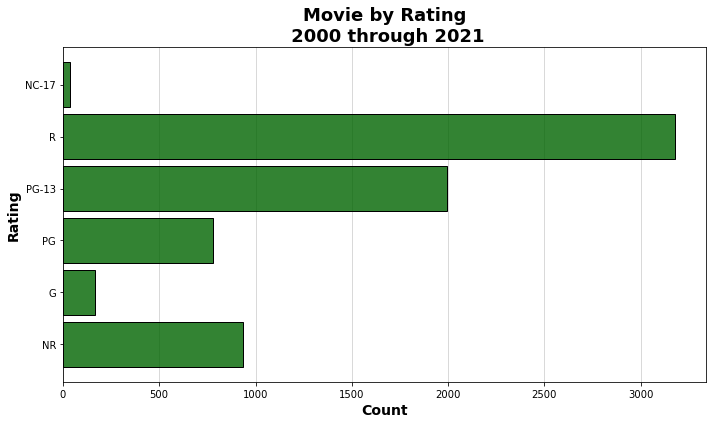

In [13]:
## Set certification to a categorical ordering
tmdb_fin['certification'] = pd.Categorical(tmdb_fin['certification'],
                                           ['NC-17', 'R','PG-13','PG','G', 'NR'])
## Visualize Distribution by Rating
fig, ax = plt.subplots(figsize = (10,6))
sns.histplot(y = tmdb_fin['certification'], 
             color = "#006400", alpha = .8, shrink = .85)
plt.title('Movie by Rating\n 2000 through 2021', 
             fontsize = 18, weight = 'bold')
plt.xlabel('Count', fontsize=14, weight = 'semibold')
plt.ylabel('Rating',  fontsize=14, weight = 'semibold')
plt.grid(axis = 'x', alpha = .6)
ax.set_axisbelow(True)
fig.tight_layout()

### Viz: Mean Budget and Revenue by Rating

In [14]:
tmdb_fin.groupby('certification')['budget'].mean().sort_values(ascending = False)

certification
PG       4.210038e+07
PG-13    4.039237e+07
G        3.108911e+07
R        1.483547e+07
NR       2.848204e+06
NC-17    2.642796e+06
Name: budget, dtype: float64

In [15]:
tmdb_fin.groupby('certification')['revenue'].mean().sort_values(ascending = False)

certification
PG       1.267050e+08
PG-13    1.182030e+08
G        9.362867e+07
R        3.127063e+07
NR       6.517031e+06
NC-17    5.069658e+06
Name: revenue, dtype: float64

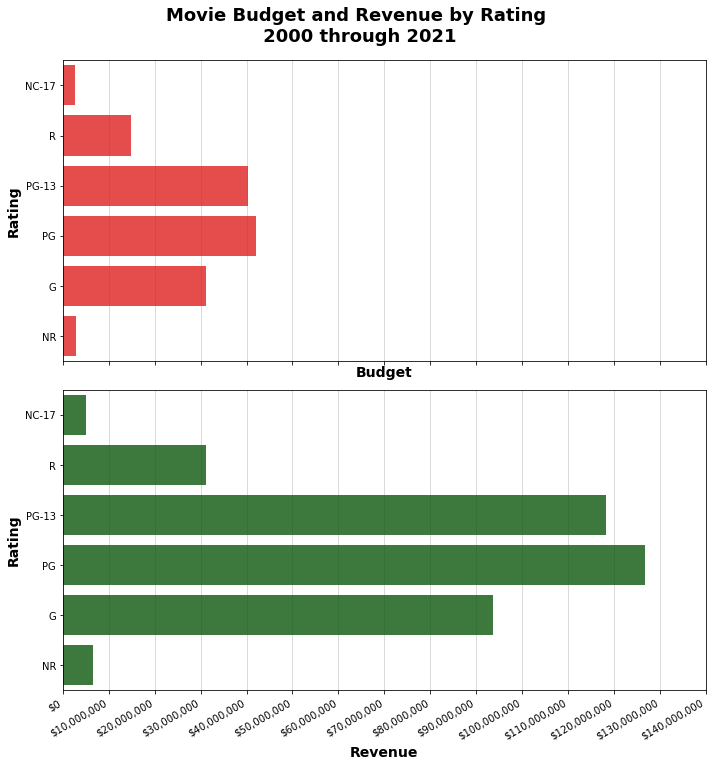

In [16]:
from matplotlib.ticker import StrMethodFormatter

fig, axes = plt.subplots(figsize=(10,10), nrows = 2, sharex = True)
plt.suptitle('Movie Budget and Revenue by Rating\n 2000 through 2021', 
             fontsize = 18, weight = 'bold', y = 1.06)
sns.barplot(data = tmdb_fin, x = 'budget', y = 'certification', 
            ci = None, color = "red", alpha = .8, ax = axes[0])
axes[0].set_xlabel('Budget', fontsize=14, weight = 'semibold')
axes[0].set_ylabel('Rating',  fontsize=14, weight = 'semibold')
sns.barplot(data = tmdb_fin, x = 'revenue', y = 'certification', 
            ci = None, color = "#006400", alpha = .8, ax = axes[1])
axes[1].set_xlabel('Revenue', fontsize=14, weight = 'semibold')
axes[1].set_ylabel('Rating',  fontsize=14, weight = 'semibold')
[ax.grid(axis = 'x', alpha = .6) for ax in axes]
[ax.set_axisbelow(True) for ax in axes]
axes[1].xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
plt.xlim(0,140000000)
plt.xticks(range(0, 141000000, 10000000),rotation = 30, ha = 'right')
fig.tight_layout()

### Viz: Relationship between Budget and Revenue

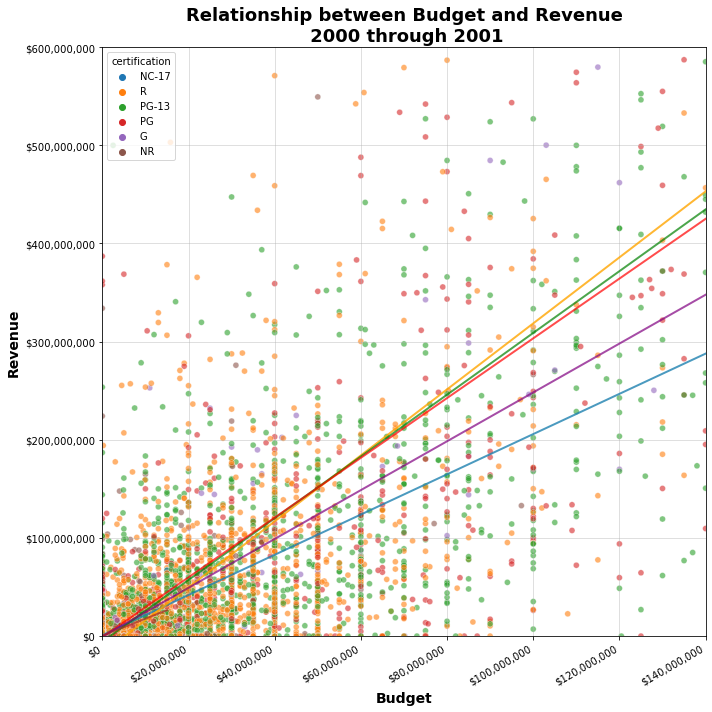

In [17]:
fig, ax = plt.subplots(figsize = (10,10))
sns.scatterplot(data = tmdb_fin, x = 'budget', y = 'revenue', hue = "certification", alpha = .6);
sns.regplot(data=tmdb_fin[tmdb_fin['certification'] == 'R'], x = 'budget', y = 'revenue', 
            scatter_kws={'s':0}, ci=None,
            line_kws={'color': '#1e81b0', 'lw' : 2, 'alpha' : .8})
sns.regplot(data=tmdb_fin[tmdb_fin['certification'] == 'PG-13'], x = 'budget', y = 'revenue', 
            scatter_kws={'s':0}, ci=None,
            line_kws={'color': "orange", 'lw' : 2, 'alpha' : .8})
sns.regplot(data=tmdb_fin[tmdb_fin['certification'] == 'PG'], x = 'budget', y = 'revenue', 
            scatter_kws={'s':0}, ci=None,
            line_kws={'color': "green", 'lw' : 2, 'alpha' : .7})
sns.regplot(data=tmdb_fin[tmdb_fin['certification'] == 'G'], x = 'budget', y = 'revenue', 
            scatter_kws={'s':0}, ci=None,
            line_kws={'color': "red", 'lw' : 2, 'alpha' : .7})
sns.regplot(data=tmdb_fin[tmdb_fin['certification'] == 'NR'], x = 'budget', y = 'revenue', 
            scatter_kws={'s':0}, ci=None,
            line_kws={'color': "purple", 'lw' : 2, 'alpha' : .7})
sns.regplot(data=tmdb_fin[tmdb_fin['certification'] == 'NC-17'], x = 'budget', y = 'revenue', 
            scatter_kws={'s':0}, ci=None,
            line_kws={'color': "brown", 'lw' : 2, 'alpha' : .7})
plt.title('Relationship between Budget and Revenue\n 2000 through 2001', 
             fontsize = 18, weight = 'bold')
plt.xlabel('Budget', fontsize=14, weight = 'semibold')
plt.ylabel('Revenue',  fontsize=14, weight = 'semibold')
ax.xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
plt.xlim(0,140000000)
plt.ylim(0,600000000)
plt.grid(alpha = .5)
plt.xticks(rotation = 30, ha = 'right')
fig.tight_layout()